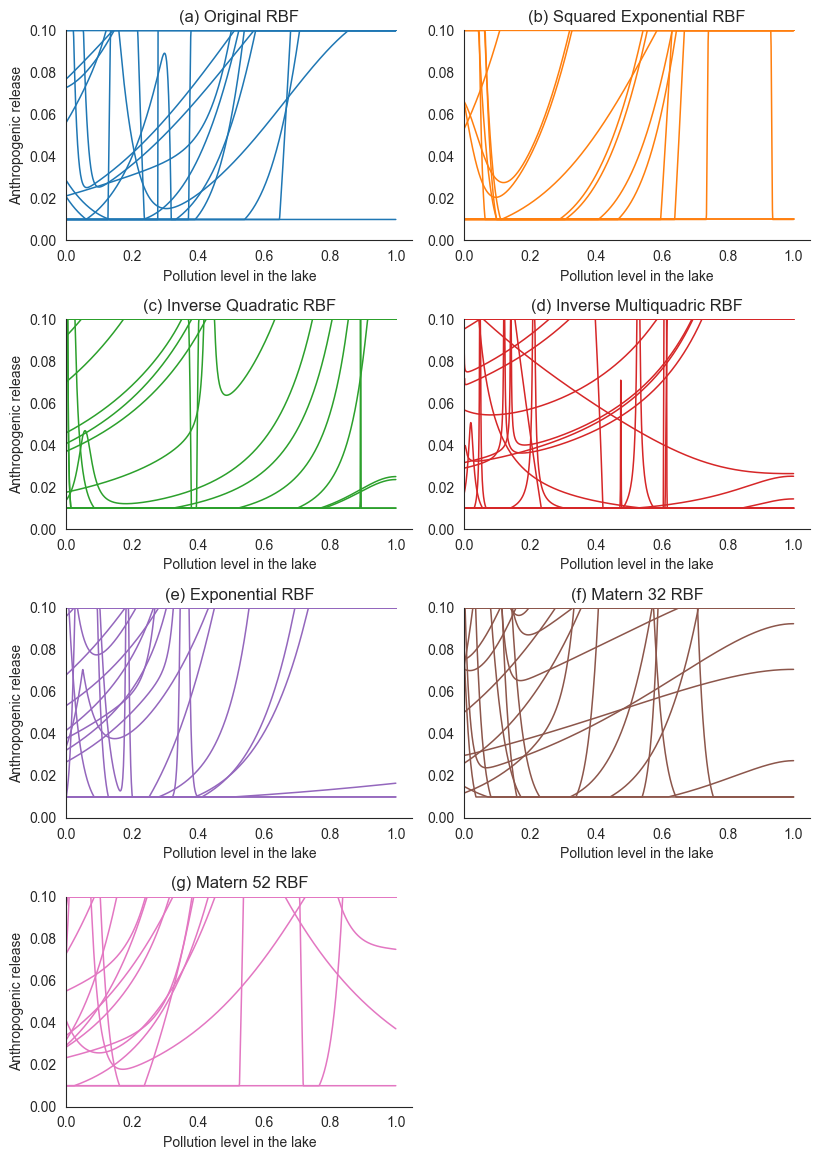

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append("..")
import seaborn as sns
from matplotlib import pyplot as plt
import rbf_functions
import os

n_inputs = 1  # (time, storage of Conowingo)
n_outputs = 1  # Atomic, Baltimore, Chester, Downstream:- (hydropower, environmental)
n_rbfs = n_inputs + 1

rbfs = [
    rbf_functions.original_rbf,
    rbf_functions.squared_exponential_rbf,
    rbf_functions.inverse_quadratic_rbf,
    rbf_functions.inverse_multiquadric_rbf,
    rbf_functions.exponential_rbf,
    rbf_functions.matern32_rbf,
    rbf_functions.matern52_rbf,
]

output_dir = os.path.abspath("../notebooks/refsets/")
name = "original_rbf"
filename = f"{name}_refset_variables.csv"
filename2 = f"{name}_refset.csv"
df_dvars = pd.read_csv(f"{output_dir}/{filename}", header=None)
df_refset = pd.read_csv(f"{output_dir}/{filename2}")

from matplotlib.lines import Line2D
sns.set_style("white")

x = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(8.3, 11.7))
axes = axes.flatten()

# Prepare a list of subplot labels
labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

for idx, (entry, c, ax) in enumerate(zip(rbfs, sns.color_palette(), axes)):
    rbf = rbf_functions.RBF(n_rbfs, n_inputs, n_outputs, rbf_function=entry)
    name = entry.__name__
    title = name.replace("_", " ").title().replace("Rbf", "RBF").replace("Matern32", "Matern 32").replace("Matern52", "Matern 52")

    # Add the subplot label next to the title
    ax.set_title(labels[idx] + ' ' + title)

    filename = f"{name}_refset_variables.csv"
    filename2 = f"{name}_refset.csv"
    df_dvars = pd.read_csv(f"{output_dir}/{filename}", header=None)
    df_refset = pd.read_csv(f"{output_dir}/{filename2}")

    y = []
    for _, row in df_dvars.iterrows():
        rbf.set_decision_vars(row.values)
        yi = [
            min(
                max(
                    rbf.apply_rbfs(
                        np.asarray(
                            [
                                xi,
                            ]
                        )
                    )[0],
                    0.01,
                ),
                0.1,
            )
            for xi in x
        ]
        y.append(yi)

    ax.plot(x, np.asarray(y).T, c=c, alpha=1, lw=1.1)
    sns.despine()
    ax.set_xlabel("Pollution level in the lake")

    # Set y-label only for plots in the first column
    if idx % 2 == 0:
        ax.set_ylabel("Anthropogenic release")
    else:
        ax.set_ylabel("")

    ax.set_xlim(xmin=0)
    ax.set_ylim(0, 0.10)  # Preserve the 0.10 as the upper bound for y-axis

# Remove the empty plot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig("../figs/paper_figures/pdf/lake_problem_rules.pdf", bbox_inches="tight")
plt.savefig("../figs/paper_figures/png/lake_problem_rules.pdf", bbox_inches="tight")
plt.show()